# Collect Threshold HSV

In [1]:
import cv2
import sys
import numpy as np

def nothing(x):
    pass

# Load in image
image = cv2.imread('smallLine.jpg')

# Create a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing)
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

output = image
wait_time = 33

while(1):

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')

    # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(image,image, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display output image
    cv2.imshow('image',output)

    # Wait longer to prevent freeze for videos.
    if cv2.waitKey(wait_time) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)


# filter color

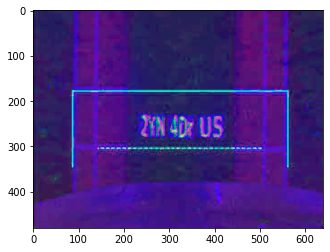

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image=cv2.imread('DSC71403.jpg')
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()

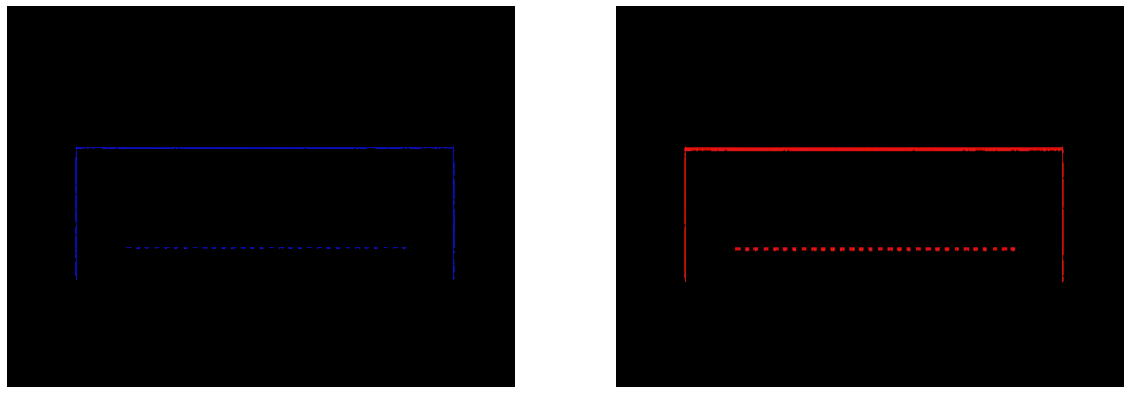

In [3]:
# lower red
lower_red = np.array([0,218,206])
upper_red = np.array([179,255,255])

#upper red
lower_red2 = np.array([0,218,206])
upper_red2 = np.array([179,255,255])

mask = cv2.inRange(img_hsv, lower_red, upper_red)
res = cv2.bitwise_and(image,image, mask= mask)
# res = cv2.GaussianBlur(res, (7, 7), 0) 

mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
res2 = cv2.bitwise_and(image,image, mask= mask2)
# res2 = cv2.GaussianBlur(res2, (7, 7), 0) 

img5 = cv2.addWeighted(res,0.5,res2,0.5,0)
# img5 = cv2.medianBlur(img5,3)

# dilate images
dilate = cv2.dilate(img5,(5,5), iterations =3)
result = cv2.cvtColor(dilate,cv2.COLOR_BGR2RGB)

# result = cv2.medianBlur(result,3)
# print('result:', result)

plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.imshow(res)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(result)
plt.axis('off')
plt.imsave('cut3.jpg', result)
plt.show()
# cv2.imshow('res5',img5)
# cv2.waitKey(0)
# cv2.destroyAllWindows()